/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Press enter to continue
Press enter to continue
Press enter to continue


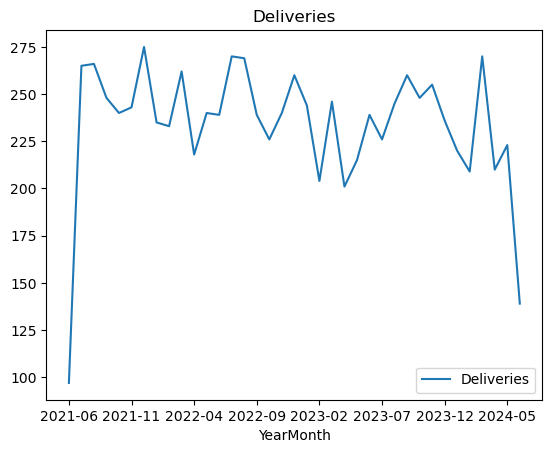

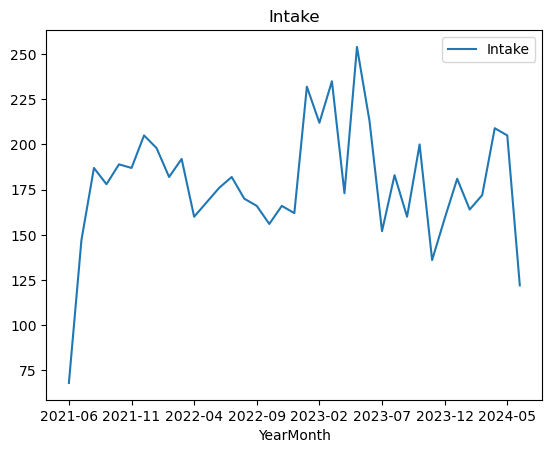

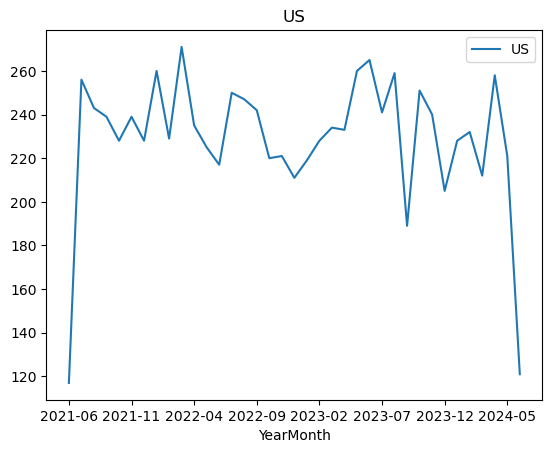

In [1]:
# Read CombinedData.csv and plot each column against the first column which is date / time in YYYY-MM format

import pandas

data = pandas.read_csv('CombinedData.csv')

for column in data.columns:
    if column != 'YearMonth':
        data.plot(x='YearMonth', y=column, title=column)
        print('Press enter to continue')

In [2]:
# Use plotly and superimpose the plots together with a legend
import plotly.express as px

fig = px.line(data, x='YearMonth', y=data.columns[1:], title='All columns')
fig.show()

Model score: -0.14573817259253952
Predicted deliveries: [194.074]
Actual deliveries: 139


c:\Users\anshi\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


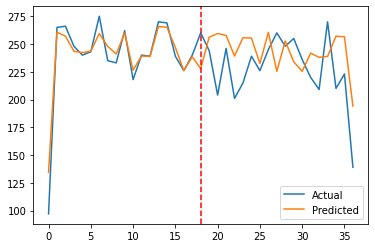

In [10]:
# Build a regression model to predict Deliveries based on the other columns, ignoring date / time
from sklearn.model_selection import train_test_split

X = data.drop(columns=['YearMonth', 'Deliveries'])
y = data['Deliveries']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Replace the random split so that train is the first 80% of the data and test is the remainder 
split = int(len(X) * 0.5)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Instead of Liear Regressionm try a more advanced model
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor() Update this to have only stumps
model = RandomForestRegressor(max_depth=4)
model.fit(X_train, y_train)

print('Model score:', model.score(X_test, y_test))

# Predict the Deliveries for the last row in the data
print('Predicted deliveries:', model.predict([X.iloc[-1]]))
print('Actual deliveries:', y.iloc[-1])

# Plot the actual deliveries against the predicted deliveries
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(model.predict(X), label='Predicted')
# add a vertical line to demarcate the training and test data
plt.axvline(x=split, color='r', linestyle='--')
plt.legend()
plt.show()

# Use historical values of each variable (including the target variable) as predictors of the current value of the target variable.

In [4]:
data.head()

,YearMonth,Deliveries,Intake,US
0,2021-06,97,68,117
1,2021-07,265,147,256
2,2021-08,266,187,243
3,2021-09,248,178,239
4,2021-10,240,189,228


In [11]:
# Create an enhanced dataset with the "lagged" signals as new columns, going back to two lags
df_lagged = data.copy()
df_lagged['Deliveries_lag_1'] = df_lagged['Deliveries'].shift(1)
df_lagged['Deliveries_lag_2'] = df_lagged['Deliveries'].shift(2)

df_lagged['Intake_lag_1'] = df_lagged['Intake'].shift(1)
df_lagged['Intake_lag_2'] = df_lagged['Intake'].shift(2)

df_lagged['US_lag_1'] = df_lagged['US'].shift(1)
df_lagged['US_lag_2'] = df_lagged['US'].shift(2)

#Modify the earlier code in this block to use 10 lags
# df_lagged = data.copy()
# for column in data.columns[1:]:
#     for i in range(1, 11):
#         df_lagged[f'{column}_lag_{i}'] = df_lagged[column].shift(i)
        
# Drop the rows with missing values

df_lagged = df_lagged.dropna()
df_lagged.head()


,YearMonth,Deliveries,Intake,US,Deliveries_lag_1,Deliveries_lag_2,Deliveries_lag_3,Deliveries_lag_4,Deliveries_lag_5,Deliveries_lag_6,...,US_lag_1,US_lag_2,US_lag_3,US_lag_4,US_lag_5,US_lag_6,US_lag_7,US_lag_8,US_lag_9,US_lag_10
10,2022-04,218,160,235,262.0,233.0,235.0,275.0,243.0,240.0,...,271.0,229.0,260.0,228.0,239.0,228.0,239.0,243.0,256.0,117.0
11,2022-05,240,168,225,218.0,262.0,233.0,235.0,275.0,243.0,...,235.0,271.0,229.0,260.0,228.0,239.0,228.0,239.0,243.0,256.0
12,2022-06,239,176,217,240.0,218.0,262.0,233.0,235.0,275.0,...,225.0,235.0,271.0,229.0,260.0,228.0,239.0,228.0,239.0,243.0
13,2022-07,270,182,250,239.0,240.0,218.0,262.0,233.0,235.0,...,217.0,225.0,235.0,271.0,229.0,260.0,228.0,239.0,228.0,239.0
14,2022-08,269,170,247,270.0,239.0,240.0,218.0,262.0,233.0,...,250.0,217.0,225.0,235.0,271.0,229.0,260.0,228.0,239.0,228.0


Model score: -1.300945050784104
Predicted deliveries: [256.34551888]
Actual deliveries: 139


c:\Users\anshi\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


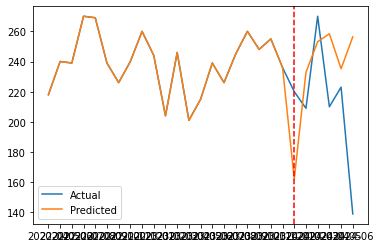

In [14]:
# Build a regression model to predict Deliveries based on the other columns, ignoring date / time
from sklearn.model_selection import train_test_split

X = df_lagged.drop(columns=['YearMonth', 'Deliveries'])
y = df_lagged['Deliveries']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Replace the random split so that train is the first 80% of the data and test is the remainder 
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('Model score:', model.score(X_test, y_test))

# Predict the Deliveries for the last row in the data
print('Predicted deliveries:', model.predict([X.iloc[-1]]))
print('Actual deliveries:', y.iloc[-1])

# Plot the actual deliveries against the predicted deliveries
import matplotlib.pyplot as plt

# plt.plot(y, label='Actual')
# plt.plot(model.predict(X), label='Predicted')
# update the plot command to include the time axis 
plt.plot(df_lagged['YearMonth'], y, label='Actual')
plt.plot(df_lagged['YearMonth'], model.predict(X), label='Predicted')

# add a vertical line to demarcate the training and test data
plt.axvline(x=split, color='r', linestyle='--')
plt.legend()
plt.show()

# #Edit the code in this block to make the x axis more readable
# import matplotlib.pyplot as plt

# plt.plot(df_lagged['YearMonth'], y, label='Actual')
# plt.plot(df_lagged['YearMonth'], model.predict(X), label='Predicted')
# plt.xticks(df_lagged['YearMonth'][::12], rotation=45)


# Using autoregressive univariate modeling for Deliveries

In [ ]:
# import pandas as pd

# monthly_deliveries = data.copy()

# #Combine delivearies 

In [ ]:
# # Let's use plotly to superimpose the forecasts on the actual data
# import plotly.express as px


